In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('Files/HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


### Tworzymy obraz brakujących danych

In [3]:
df.isnull() # True/False

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### heatmapa w Seaborn

<Axes: >

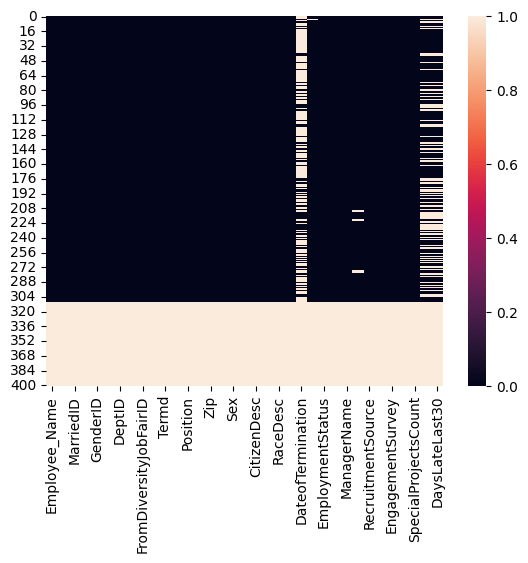

In [4]:
sns.heatmap(df.isnull())

### Ustawianie szerokości i wysokości wykresu

<Axes: >

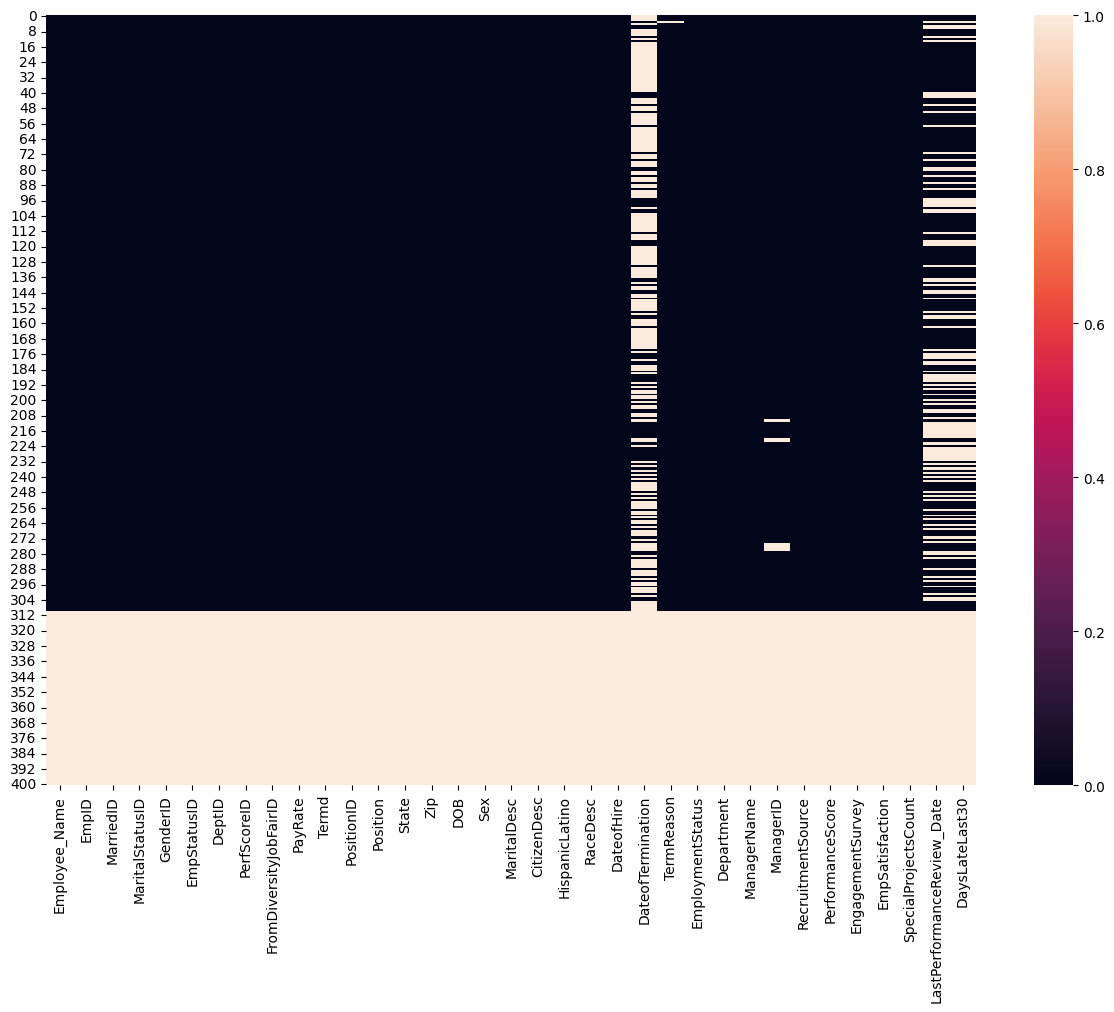

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

<Axes: >

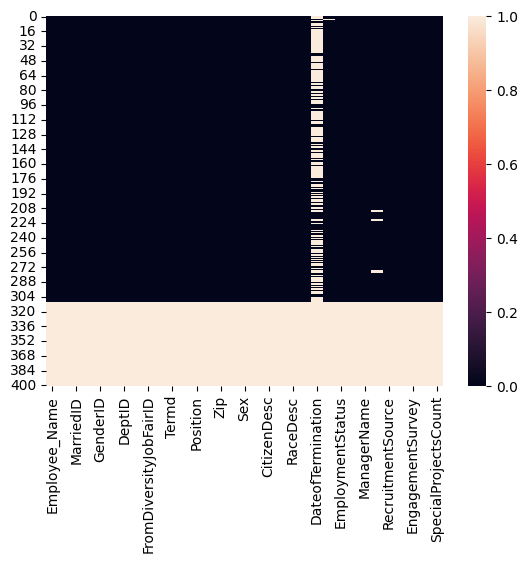

In [6]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'], axis=1,inplace=True)
sns.heatmap(df.isnull())

<Axes: >

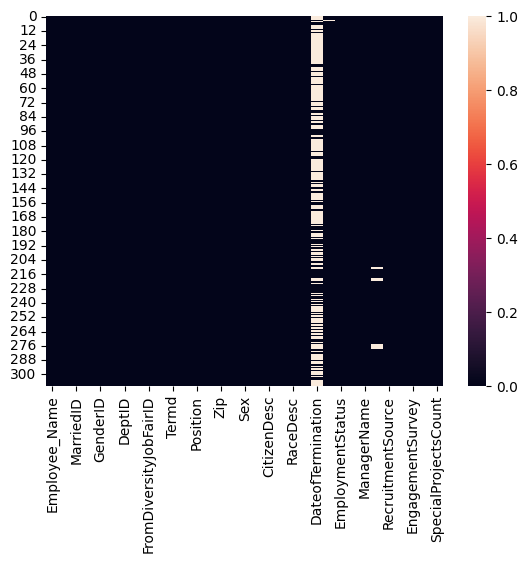

In [7]:
df.dropna(thresh=2,inplace=True)  # thresh - W tym przypadku, jeśli wiersz zawiera co najmniej 2 niebrakujące wartości, to nie zostanie usunięty
sns.heatmap(df.isnull())

### Weryfikacja Datatime

In [8]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [9]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


### Konwersja dat przy pomocy funkcji to_datetime

In [10]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')  # dopytać

In [11]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


# Analizujemy Dane

##### Styl wykresu

In [12]:
sns.set_style('darkgrid')

In [13]:
##### Histogram distplot

C:\Users\GTata\AppData\Local\Temp\ipykernel_17652\4225706387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PayRate'])


<Axes: xlabel='PayRate', ylabel='Density'>

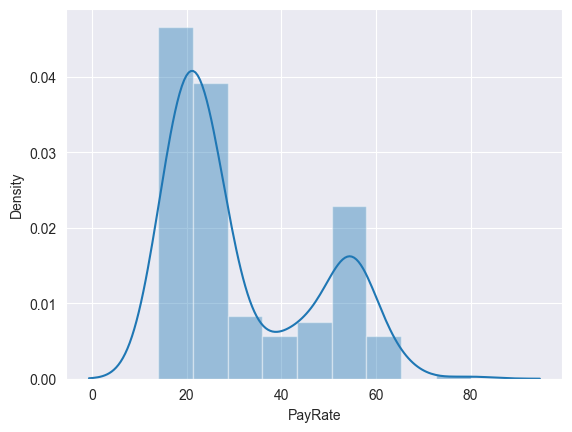

In [14]:
sns.distplot(df['PayRate'])

In [15]:
#### Różne parametry bw, od których zależy stopień wygładzania

C:\Users\GTata\AppData\Local\Temp\ipykernel_17652\785422004.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['PayRate'], shade=True, bw=.05, color='green')
C:\Users\GTata\AppData\Local\Temp\ipykernel_17652\785422004.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['PayRate'], shade=True, bw=.05, color='green')
C:\Users\GTata\AppData\Local\Temp\ipykernel_17652\785422004.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['PayRate'], shade=True, bw=.5, color='re

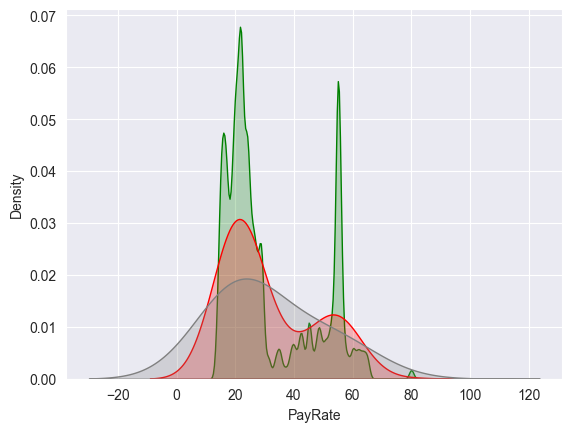

In [16]:
sns.kdeplot(df['PayRate'], shade=True, bw=.05, color='green')
sns.kdeplot(df['PayRate'], shade=True, bw=.5, color='red')
sns.kdeplot(df['PayRate'], shade=True, bw=.95, color='grey')
plt.show()

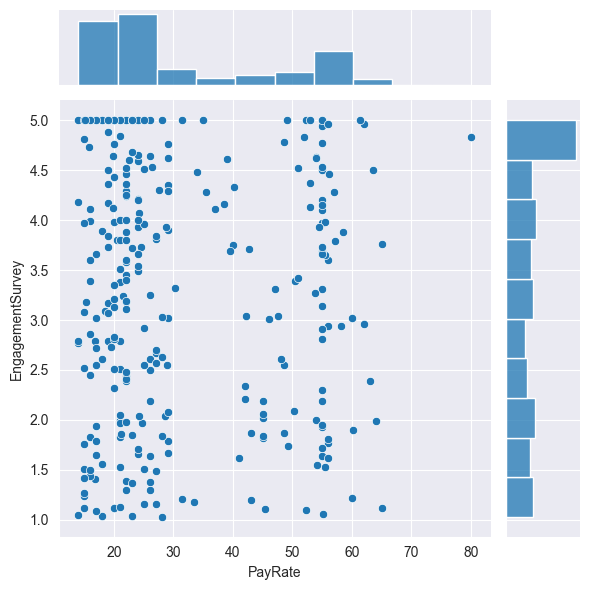

In [17]:
sns.jointplot(x='PayRate',y='EngagementSurvey',data=df)

#### Porównanie zarobków do stażu pracy w firmie

In [18]:
# timedelta64 - reprezentuje różnicę w czasie taką jak różnica pomiędzy dwiema datami
# timedelta64(1,'Y') - oznacza różnicę czasu w jednym roku
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [19]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [20]:
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


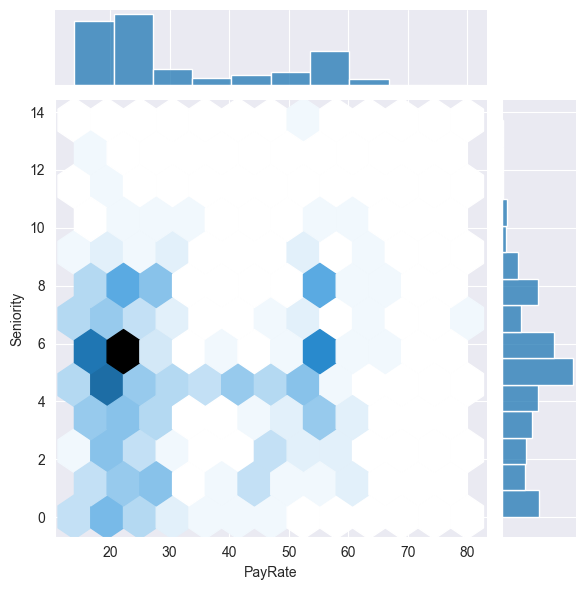

In [21]:
sns.jointplot(x='PayRate',y='Seniority',data=df,kind='hex')

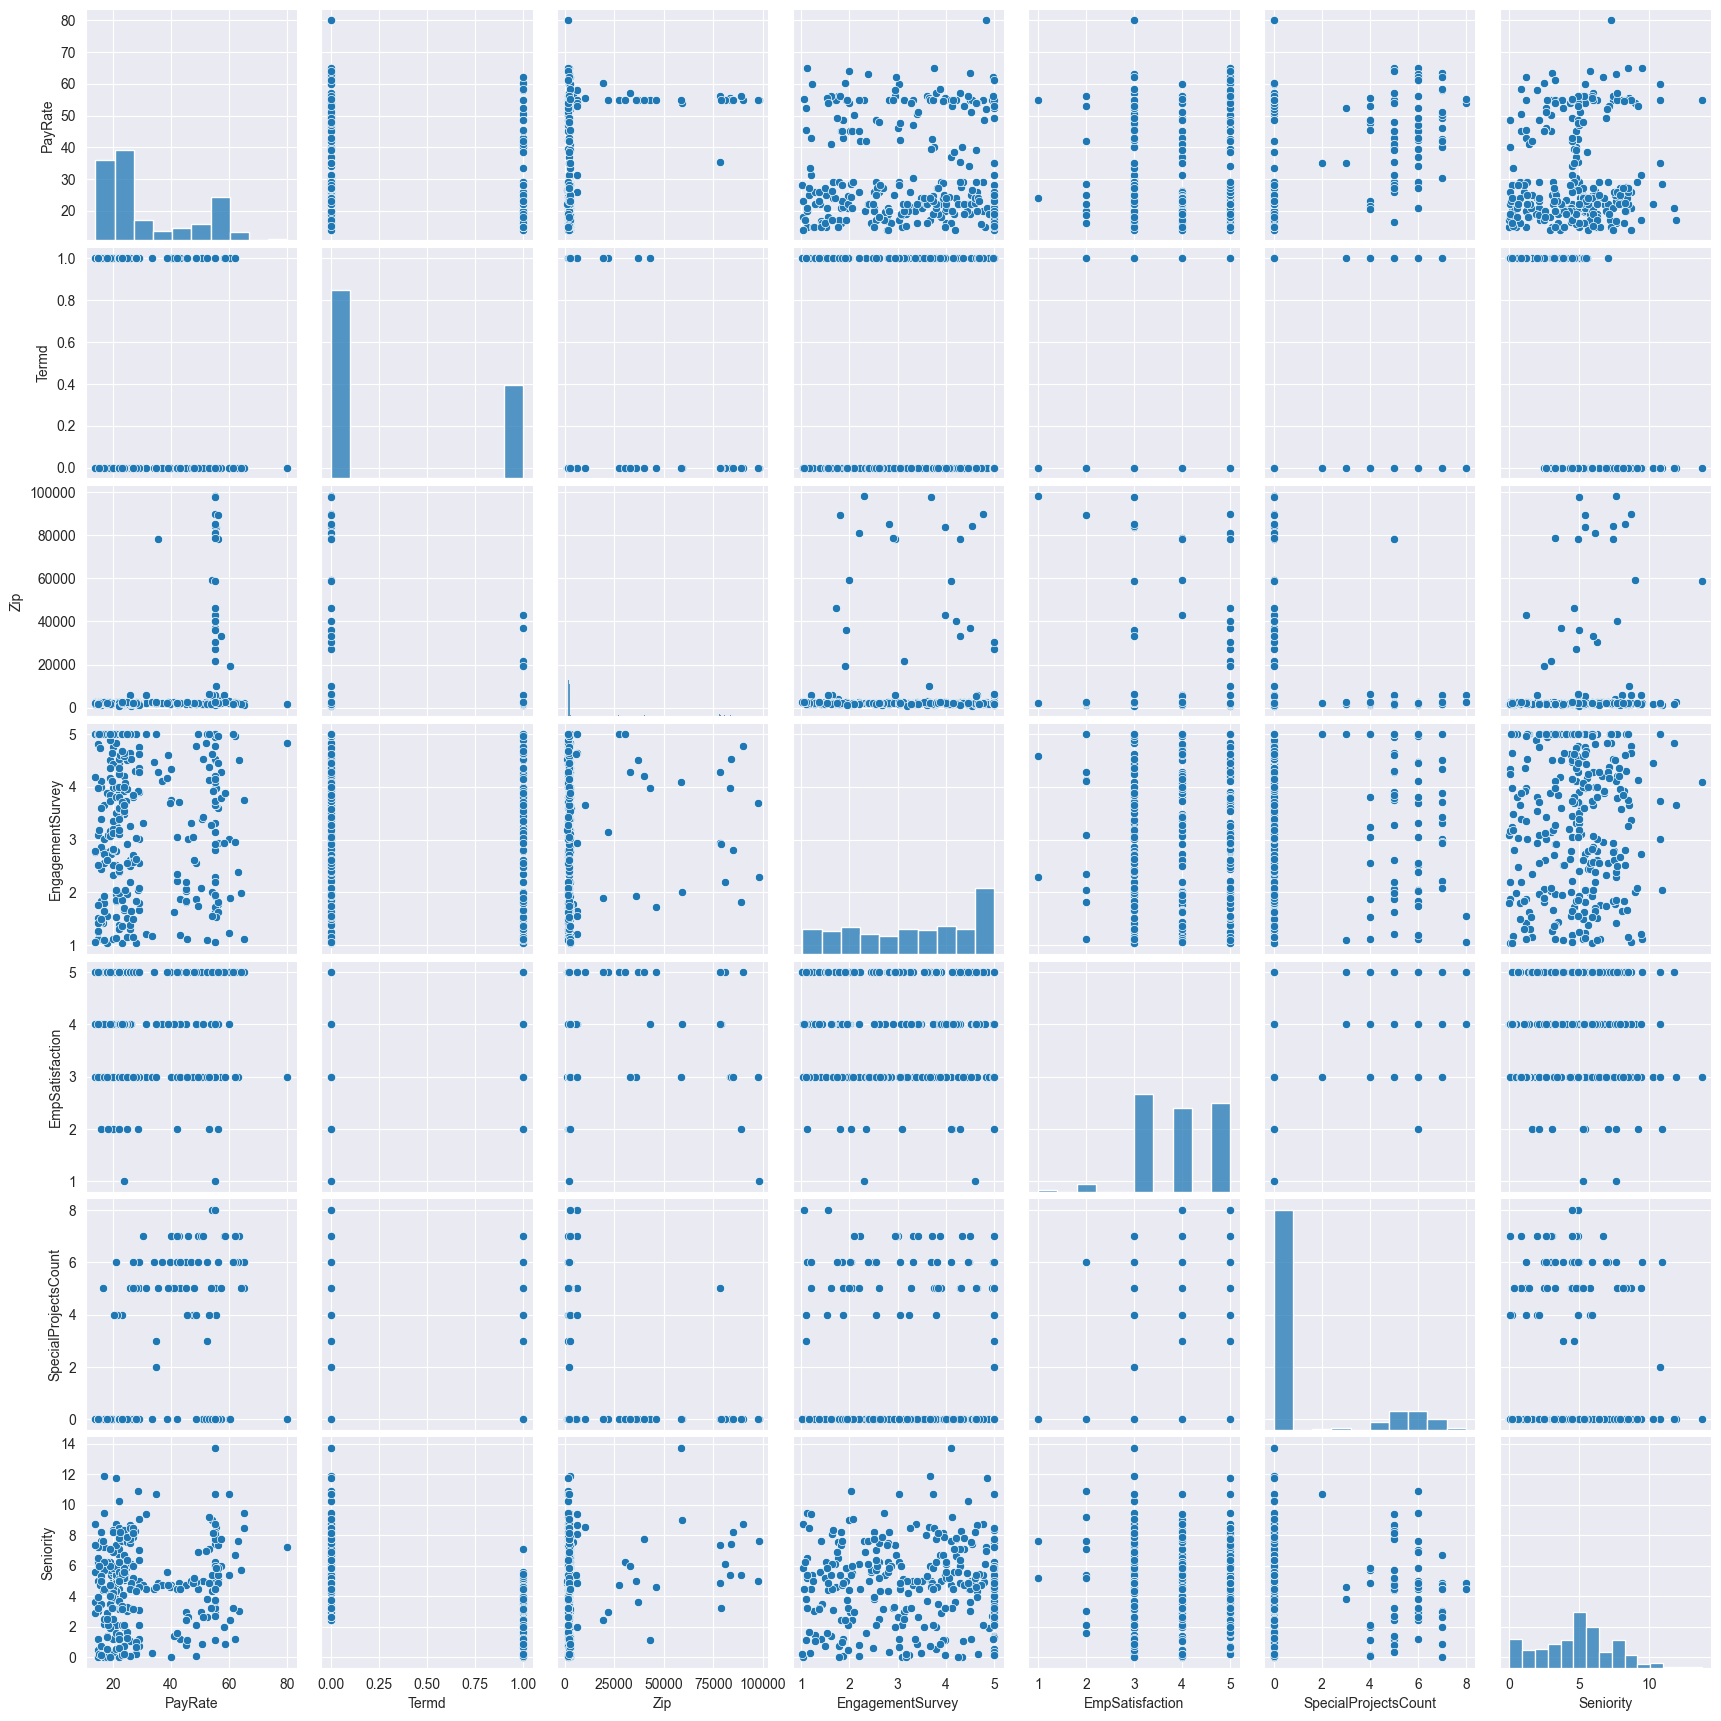

In [22]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))  # ignoruje kolumny kończące się na 'ID'

#### Średnia Stawka wynagrodzenia w zależności od departamentu

<Axes: xlabel='Department', ylabel='PayRate'>

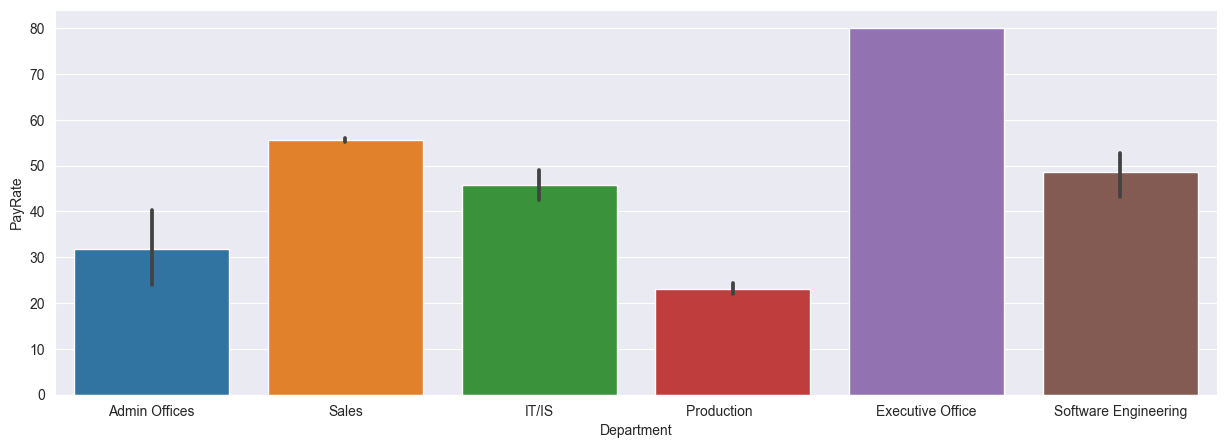

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department', y='PayRate', data=df)

#### Mediana Stawki wynagrodzenia w zależności od departamentu

<Axes: xlabel='Department', ylabel='PayRate'>

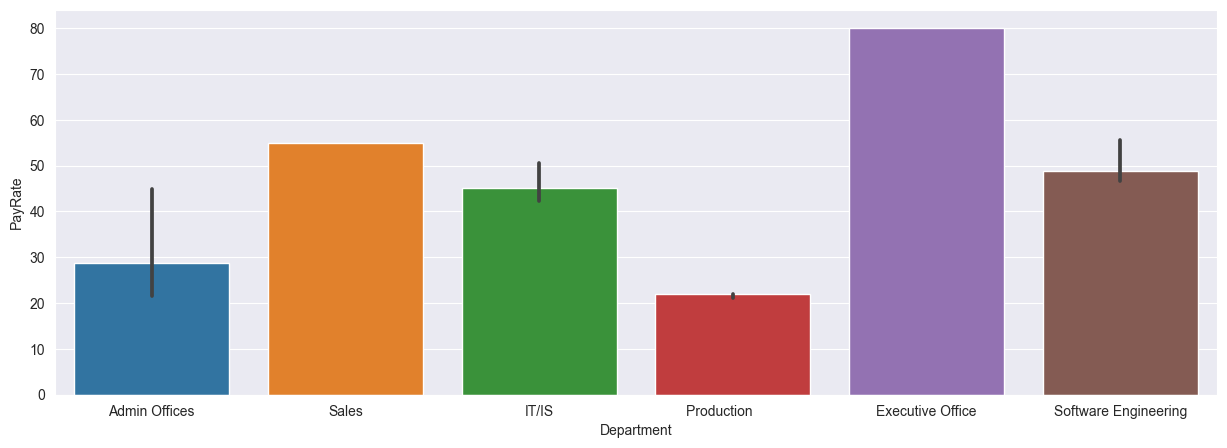

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df,estimator=np.median)

#### Liczba zatrudnionych w poszczególnych działach

<Axes: xlabel='Department', ylabel='count'>

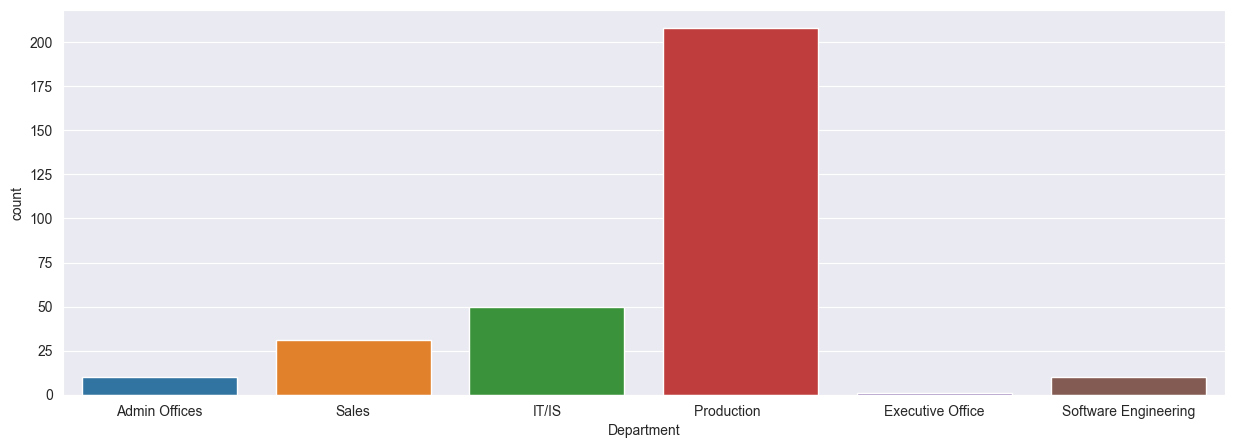

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department',data=df)

#### Stawka wynagrodzenia w zależności od płci - boxplot

<Axes: xlabel='Sex', ylabel='PayRate'>

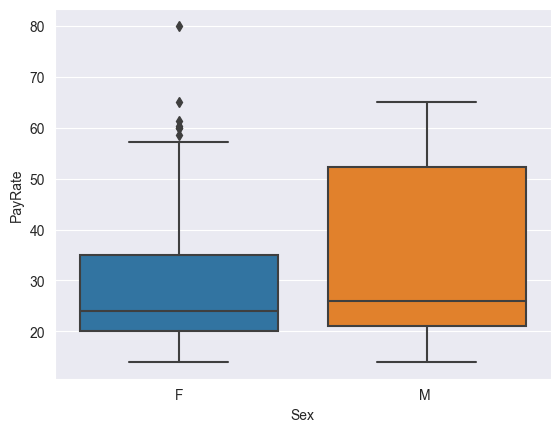

In [26]:
sns.boxplot(x='Sex',y='PayRate',data=df)

#### Zestawienie departamentów ze względu na płeć

In [27]:
pd.crosstab(df['Department'],df['Sex'])

Sex,F,M
Department,,
Admin Offices,6,4
Executive Office,1,0
IT/IS,22,28
Production,127,81
Sales,15,16
Software Engineering,6,4


#### Analiza wynagrodzenia ze względu na płeć i przynależność do grupy etnicznej latynosów

<Axes: xlabel='Sex', ylabel='PayRate'>

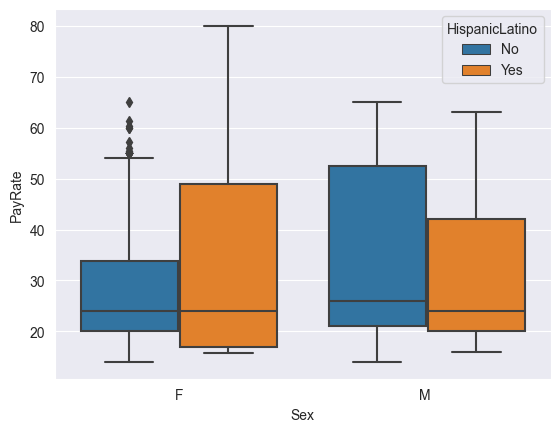

In [28]:
df['HispanicLatino'] = df['HispanicLatino'].str.title()
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

# Więcej wykresów

### violinplot - wykres rozkładu zmiennej w połączeniu z wykresem pudełkowym

<Axes: xlabel='Sex', ylabel='PayRate'>

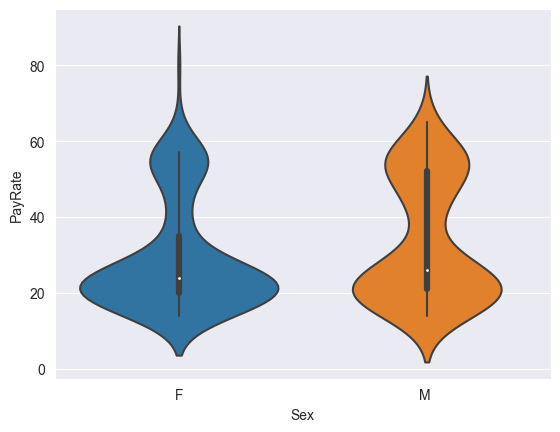

In [31]:
sns.violinplot(x='Sex', y='PayRate', data=df)
# Biała kropka - mediana (powłowa jest większa lub równa medianie, a połowa jest mniejsza lub równa medianie)

<Axes: xlabel='Sex', ylabel='PayRate'>

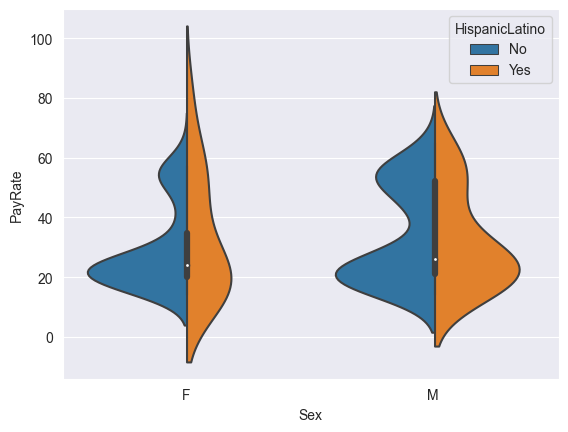

In [33]:
sns.violinplot(x='Sex', y='PayRate', data=df, hue='HispanicLatino', split=True)

### FacetGrid - czy wewnątrz poszczególnych działów wpływ na wynagrodzenia ma płeć lub staż pracy.

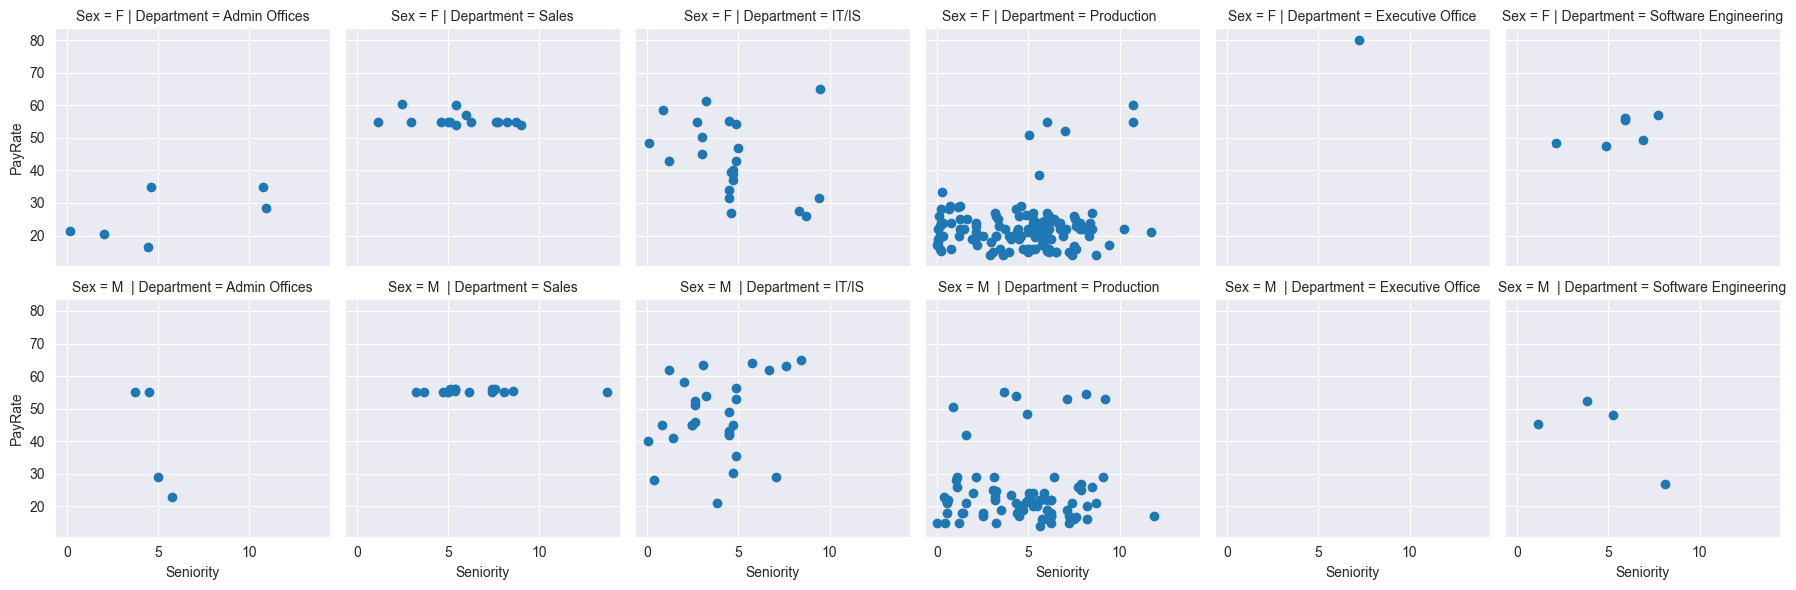

In [38]:
g = sns.FacetGrid(data=df, col='Department', row='Sex')
g.map(plt.scatter,'Seniority','PayRate')

### lmplot - na podstawie wskazanej zmiennej objaśniającej stworzy na wykresie reprezentację modelu regresji liniowej.

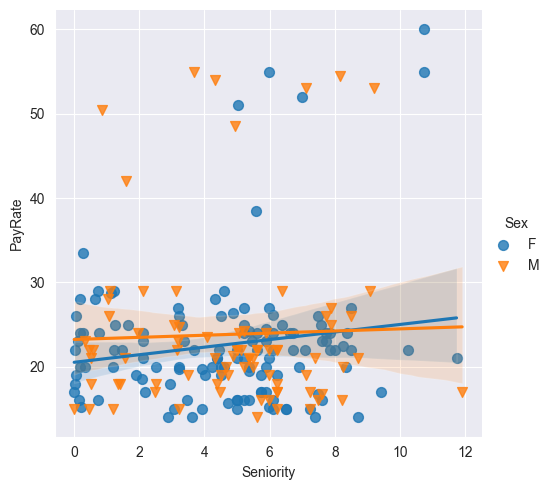

In [39]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production       ')],hue='Sex',markers=['o','v'],
          scatter_kws={'s':50})

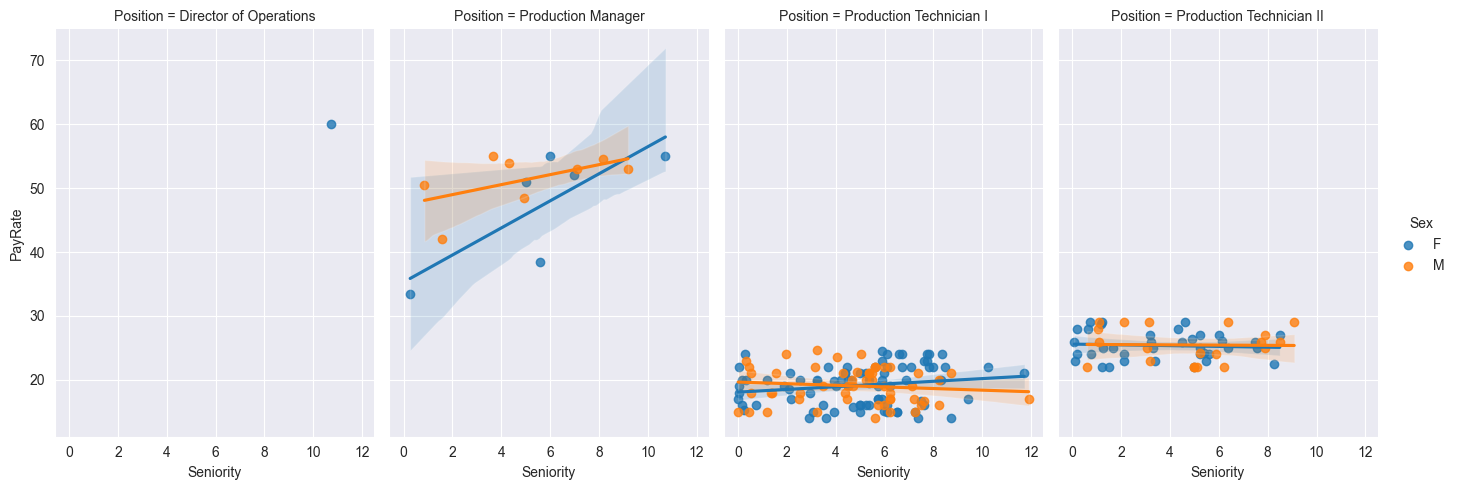

In [40]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production       ')],col='Position',hue='Sex',aspect=0.7)


## Heatmap

In [41]:
df.pivot_table(index=df['DateofHire'].dt.month, columns=df['DateofHire'].dt.day, values='EmpID', aggfunc='count').fillna(0)

DateofHire,1,2,3,4,5,6,7,8,9,10,...,20,21,24,25,26,27,28,29,30,31
DateofHire,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,16.0,5.0,6.0,1.0,9.0,14.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0
4,3.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
5,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
7,0.0,3.0,0.0,1.0,11.0,4.0,9.0,9.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,9.0,1.0,0.0,11.0,10.0,0.0


<Axes: xlabel='DateofHire', ylabel='DateofHire'>

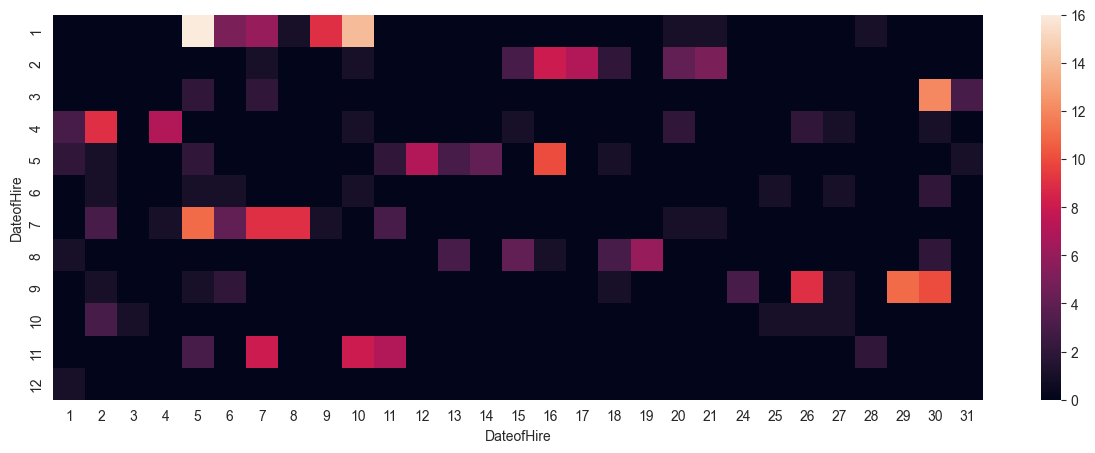

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['DateofHire'].dt.month, columns=df['DateofHire'].dt.day, values='EmpID', aggfunc='count').fillna(0))